In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [113]:
from data_structures.cfr_trees import *
from data_structures.trees import *
from cfr_code.reconstruction_cfr import *
from cfr_code.sample_cfr import *
from utilities.graphs import *
from games.kuhn import build_kuhn_tree

In [44]:
%load_ext autoreload
%autoreload 2

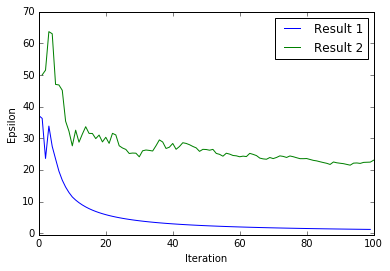

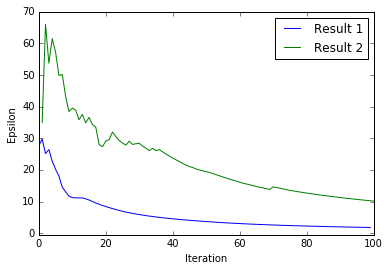

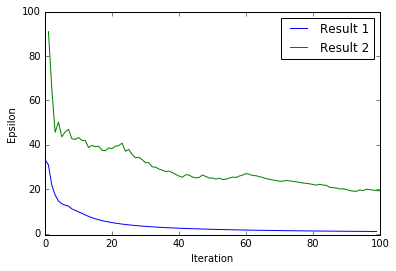

In [111]:
def test_random():
    tree = randomTree(8, 3, 0)
    cfr_tree = CFRTree(tree)
    ct1 = CFRTree(tree)
    res1 = SolveWithReconstructionCFR(ct1, 100, show_perc = False, checkEveryIteration = 1)
    ct2 = CFRTree(tree)
    res2 = SolveWithSampleCFR(ct2, 100, show_perc = False, checkEveryIteration = 1)
    comparative_epsilon_graph([res1, res2])
    return (res1, res2, tree)

test_trees = []
test_results = []
for i in range(3):
    (res1, res2, tree) = test_random()
    test_trees.append(tree)
    test_results.append((res1, res2))

In [112]:
print(test_results[0][0]["tot_time"] + test_results[1][0]["tot_time"] + test_results[2][0]["tot_time"])
print(test_results[0][1]["tot_time"] + test_results[1][1]["tot_time"] + test_results[2][1]["tot_time"])

2696.9025599956512
11.065848112106323


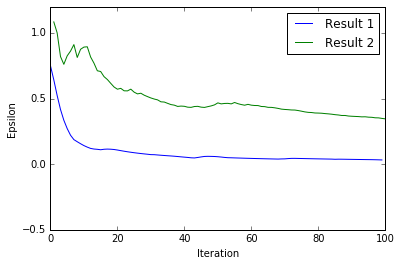

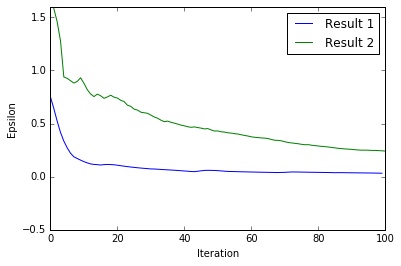

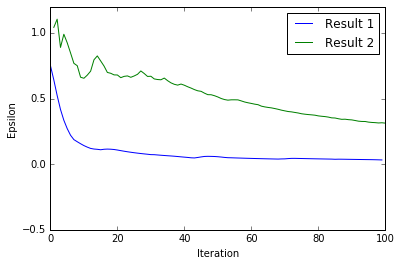

97.07621574401855
6.224161148071289


In [117]:
def test_kuhn():
    tree = build_kuhn_tree(3, 4)
    cfr_tree = CFRTree(tree)
    ct1 = CFRTree(tree)
    res1 = SolveWithReconstructionCFR(ct1, 100, show_perc = False, checkEveryIteration = 1)
    ct2 = CFRTree(tree)
    res2 = SolveWithSampleCFR(ct2, 100, show_perc = False, checkEveryIteration = 1)
    comparative_epsilon_graph([res1, res2])
    return (res1, res2, tree)

test_trees_kuhn = []
test_results_kuhn = []
for i in range(3):
    (res1, res2, tree) = test_kuhn()
    test_trees_kuhn.append(tree)
    test_results_kuhn.append((res1, res2))
    
print(test_results_kuhn[0][0]["tot_time"] + test_results_kuhn[1][0]["tot_time"] + test_results_kuhn[2][0]["tot_time"])
print(test_results_kuhn[0][1]["tot_time"] + test_results_kuhn[1][1]["tot_time"] + test_results_kuhn[2][1]["tot_time"])

In [90]:
cool_tree = test_trees[1]